# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Interpolación de Lagrange.


### Ejercicio 4.

### Se quiere aproximar la función $f(x) = \sin(x/2)$ en el intervalo $[0,2]$ mediante un polinomio interpolador de Lagrange en nodos equiespaciados, con error absoluto menor que $0.1$. 
 
### (a) Calcula un tal polinomio.
 
### (b) Llamando $P(x)$ al polinomio calculado en el apartado anterior, representa gráficamente $f(x)$, $P(x)$ y la "función error" $|f(x)-P(x)|$ en el intervalo $[0,2]$.

SOLUCIÓN

### a) Calcula un tal polinomio.

Recordamos que la <strong>función error real</strong> se puede acotar por una <strong>función cota del error</strong> y que ésta a su vez tiene una <strong>cota superior numérica del error</strong> como sigue:
$$
	\boxed{| f(x)-P(x)| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n| {x}-x_i| \leq \dfrac{M}{(n+1)!}(b-a)^{n+1}}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$

donde $M>0$ cumple $\big|f^{(n+1)}(x)\big|\leq M$ para todo $x\in [x_0,x_n]$.

En nuestro caso concreto, nuestra <strong>cota superior numérica del error</strong> debe cumplir
$$ cota(n)=\dfrac{M}{(n+1)!}(b-a)^{n+1} \leq 0.1$$
para todo $x\in [a,b]=[0,2]$.
Comenzamos definiendo la función $f(x) = \sin(x/2)$.

In [1]:
f(x)=sin(x/2)
show(f(x))

sin(1/2*x)

En este tipo de ejercicios, la cota numérica tendrá como variable $n$ acorde a los datos del problema. 
La mayor dificultad es acotar $M$. Veamos como son las derivadas sucesivas de la función.

In [13]:
show(diff(f(x),x,1))
show(diff(f(x),x,2))
show(diff(f(x),x,3))
show(diff(f(x),x,4))

1/2*cos(1/2*x)

-1/4*sin(1/2*x)

-1/8*cos(1/2*x)

1/16*sin(1/2*x)

En este caso $M=M(n)$ y se calcula de la siguiente forma: 
$$f'(x)=\dfrac{1}{2}\cos(\dfrac{x}{2}) \to |f'(x)|\leq \dfrac{1}{2}=\dfrac{1}{2^1}$$
$$f''(x)=\dfrac{-1}{4}\sin(\dfrac{x}{2}) \to |f''(x)|\leq \dfrac{1}{4}=\dfrac{1}{2^2}$$
$$f'''(x)=\dfrac{-1}{8}\cos(\dfrac{x}{2}) \to |f'''(x)|\leq \dfrac{1}{8}=\dfrac{1}{2^3}$$
$$\vdots$$
De esta forma,
$$|f^{(n+1)}(x)|\leq \dfrac{1}{2^{n+1}} \to M=M(n)= \dfrac{1}{2^{n+1}}$$ 

Además, puesto que estamos en el intervalo $[0,2]$, 
$$ cota(n)=\dfrac{M}{(n+1)!}(b-a)^{n+1}= \dfrac{1/2^{n+1}}{(n+1)!}(2-0)^{n+1}=\dfrac{2^{n+1}}{2^{n+1}(n+1)!}=\dfrac{1}{(n+1)!} \leq 0.1$$

In [4]:
cota(n)=1/factorial(n+1) 

n=0
while cota(n)>=0.1:
    n=n+1
n

3

Vemos que efectivamente la cota con $n=3$ es menor que $0.1$.

In [5]:
cota(1).n(), cota(2).n(), cota(3).n()

(0.500000000000000, 0.166666666666667, 0.0416666666666667)

A partir de aquí, realizamos el problema como los anteriores, es decir, definimos los nodos, los puntos donde el polinomio de interpolación de Lagrange actúa y el polinomio interpolador.

In [6]:
X=[2*k/n for k in range(0,n+1)]
show(X)

[0, 2/3, 4/3, 2]

In [7]:
XY=[(X[k],f(X[k])) for k in range(0,n+1)]
show(XY)

[(0, 0), (2/3, sin(1/3)), (4/3, sin(2/3)), (2, sin(1))]

In [8]:
P(x)=RR['x'].lagrange_polynomial(XY)
show(P(x))

-0.0180305628822326*x^3 - 0.00446091357342325*x^2 + 0.501779571079725*x

### (b) Llamando $P(x)$ al polinomio calculado en el apartado anterior, representa gráficamente $f(x)$, $P(x)$ y la "función error" $|f(x)-P(x)|$ en el intervalo $[0,2]$.

Comenzamos representando tanto la función, como el polinomio como los nodos de interpolación.

In [9]:
a=0
b=2

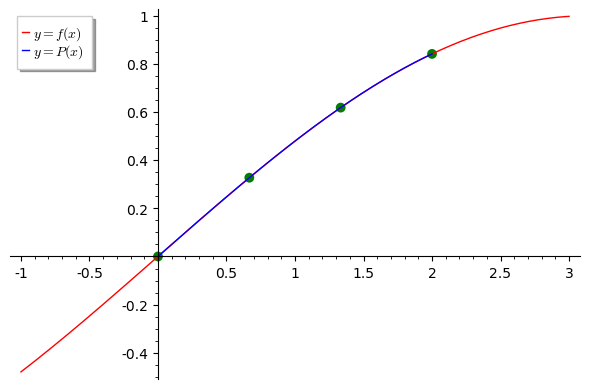

In [12]:
point2d(XY,size=50,color='green')+plot(f,-1,3,color='red',legend_label='$y=f(x)$')+plot(P(x),(x,a,b),legend_label='$y=P(x)$',color='blue')

La <strong>función cota del error</strong> es:
$$
	\boxed{error(x)=\dfrac{M}{(n+1)!}\prod_{i=0}^n| {x}-x_i|}
	\quad
	\mbox{para todo } {x}\in [x_0,x_n].
$$

In [13]:
error(x)=1/(2^(n+1))/factorial(n+1)*prod([abs(x-X[k]) for k in range(0,n+1)])
show(error(x))

1/384*abs(x - 2/3)*abs(x - 4/3)*abs(x - 2)*abs(x)

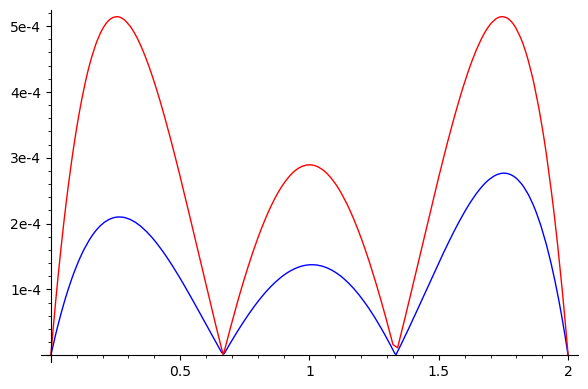

In [14]:
plot(abs(f(x)-P(x)),(x,0,2))+plot(error,(x,0,2),color='red')